In [1]:
import glob
import random

from src.load_data import SingleProject, MultiProject
from src.heuristic import schedule_jobs

# Load Patterson Dataset

In [2]:
path = "../data/patterson"

single_projects = []

for file in glob.glob(path + "/*.rcp"): 
    single_projects.append(SingleProject.read_instance(file))
    

In [3]:
projects = random.choices(single_projects, k=5)
instance = MultiProject.unify_projects(projects)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [4]:
instance.n_jobs

151

In [5]:
instance.n_resources

3

In [6]:
len(instance.durations)

151

In [7]:
len(instance.successors)

151

In [8]:
len(instance.predecessors)

151

In [9]:
len(instance.required_resources)

151

# Run a simple heuristic

In [10]:
solution =  schedule_jobs(instance)

In [11]:
solution.mpdi

214

In [12]:
import matplotlib.pyplot as plt
import numpy as np

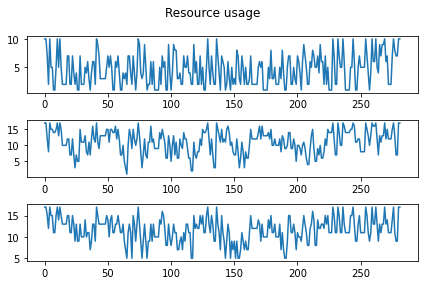

In [13]:
resources = np.concatenate(solution.resource_usage)

fig, axes = plt.subplots(resources.shape[1], 1)

fig.suptitle("Resource usage")

for i in range(resources.shape[1]):
    axes[i].plot(resources[:, i])

plt.tight_layout()

# Run the experiment 100 times

In [ ]:
mpdis = []

for i in range(100):
    
    # Lo cargo cada vez porque al unificarlos modifico los sucesores
    single_projects = []

    for file in glob.glob(path + "/*.rcp"):
        single_projects.append(SingleProject.read_instance(file))
        
    projects = random.choices(single_projects, k=5)
    instance = MultiProject.unify_projects(projects)
    
    solution =  schedule_jobs(instance)
    mpdis.append(solution.mpdi)

In [ ]:
np.nanmean(mpdis)

In [ ]:
mpdis